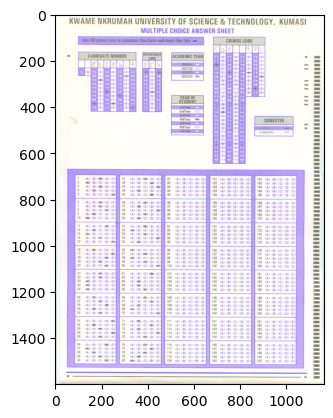

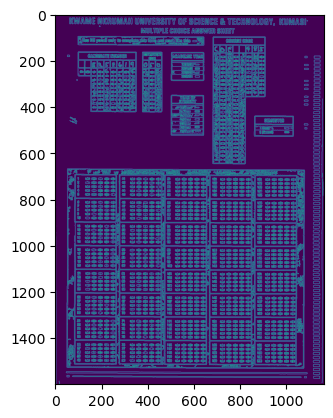

In [1]:
import cv2
import numpy as np
import utils
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

width= 1162
height = 1600


img = cv2.imread("images/001.png")

img = cv2.resize(img, (width, height)) # RESIZE IMAGE
imgContours = img.copy()
imgBlank = np.zeros((height,width, 3), np.uint8) # CREATE A BLANK IMAGE FOR TESTING DEBUGGING IF REQUIRED
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # CONVERT IMAGE TO GRAY SCALE
imgBlur = cv2.GaussianBlur(imgGray, (5, 5), 1) # ADD GAUSSIAN BLUR
imgCanny = cv2.Canny(imgBlur,10,70) # APPLY CANNY 

figure(0)
plt.imshow(img)
figure(1)
plt.imshow(imgCanny)


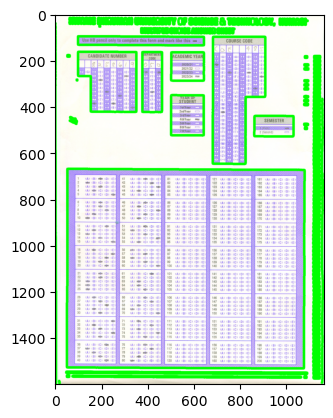

In [2]:
contours, hierarchy = cv2.findContours(imgCanny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) # FIND ALL CONTOURS
cv2.drawContours(imgContours, contours, -1, (0, 255, 0), 10) # DRAW ALL DETECTED CONTOURS
plt.imshow(imgContours)


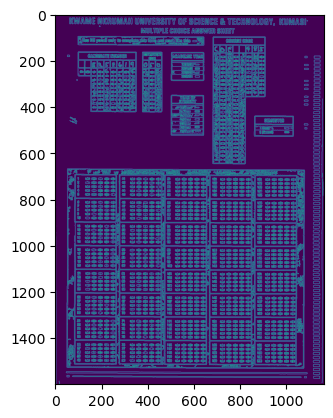

In [3]:
imgBlank = np.zeros_like(img) # CREATE A BLANK IMAGE FOR TESTING DEBUGGING IF REQUIRED
imgArray = ([img, imgGray, imgBlur, imgCanny], 
            [imgContours, imgBlank, imgBlank, imgBlank])
imgStacked = utils.stackImages(imgArray,0.5)

# Apply sharpening filter
kernel = np.array([[-1,-1,-2], [-1,9,-1], [-1,-1,-1]])
img = cv2.filter2D(imgCanny, -1, kernel)
plt.imshow(img)



# Doing Gamma Correction
Gamma corrction ensures that images are displayed correctly on the screen.


In [4]:
from matplotlib.pyplot import figure
from skimage import exposure

gamma_corrected1 = exposure.adjust_gamma(img, .5)
gamma_corrected2 = exposure.adjust_gamma(img, 9)

figure(0)
io.imshow(gamma_corrected1)
figure(1)
io.imshow(gamma_corrected2)

NameError: name 'io' is not defined

<Figure size 640x480 with 0 Axes>

## Determining Structural Similarity
It is used to find the index that indicate how much two images are similar.

In [ ]:
from skimage import metrics as ssim

ssim_original = ssim.structural_similarity(img, img, data_range=img.max() - img.min(), multichannel=True)
ssim_modified = ssim.structural_similarity(img, img_hsv, data_range=img.max() - img_hsv.min(), multichannel=True)

print(ssim_original, ssim_modified)


1.0 0.0021061834940328534


/tmp/ipykernel_40935/3766947646.py:3: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_original = ssim.structural_similarity(img, img, data_range=img.max() - img.min(), multichannel=True)
/tmp/ipykernel_40935/3766947646.py:4: FutureWarning: `multichannel` is a deprecated argument name for `structural_similarity`. It will be removed in version 1.0. Please use `channel_axis` instead.
  ssim_modified = ssim.structural_similarity(img, img_hsv, data_range=img.max() - img_hsv.min(), multichannel=True)


# OpenCV

In [ ]:
import cv2
from skimage import io

# img1 = cv2.imread('./images/download.jpg')
# img2 = cv2.imread('./images/download2.jpg')

# alpha = 0.6
# beta = 1.0 - alpha

# if img1.shape != img2.shape:
#     print("Images are not of the same size and channels")
# else:
#     final_image = cv2.addWeighted(img1, alpha, img2, beta, 0.0)

#     cv2.imshow("final image", final_image)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

## Changing contrast and brightness

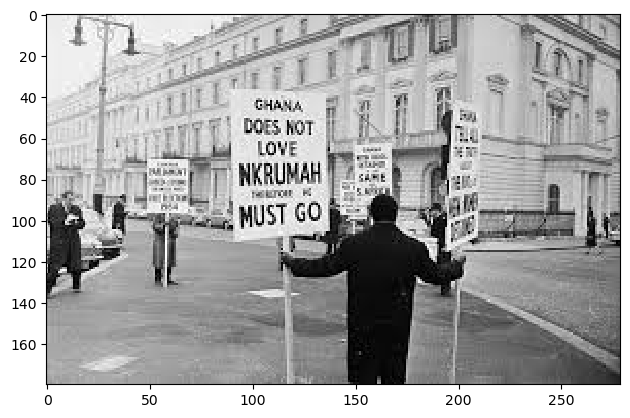

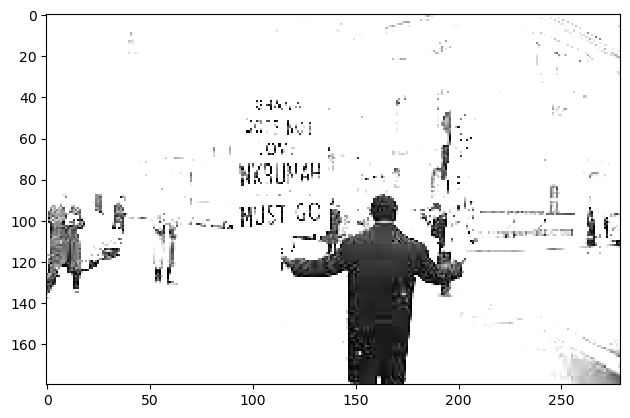

In [ ]:
import cv2 
import numpy as np
from matplotlib.pyplot import figure
from skimage import io

img =cv2.imread('./images/download.jpg')

new_image = np.zeros(img.shape, img.dtype)

contrast = 3.0
bright = 2

for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        for c in range(img.shape[2]):
            new_image[y, x, c] = np.clip(contrast*img[y,x,c] + bright, 0, 255)

figure(0)
io.imshow(img)
figure(1)
io.imshow(new_image)

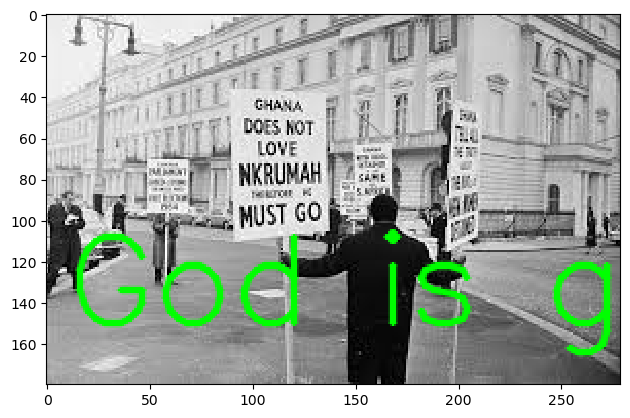

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img, 'God is great', (10, 150), font, 2, (0, 255, 0), 2, cv2.LINE_AA)
io.imshow(img)